## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


# import csv data

In [3]:
df=pd.read_csv('data/stud.csv')

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# shape of dataset
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [5]:
# check for missing values:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
# check for duplicates:
df.duplicated().sum()

np.int64(0)

In [7]:
#check fo dtypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# descriptive information:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploring data:

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable:   ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of education' variable:   ",end=" ")
print(df['parental_level_of_education'].unique())

print("categories 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

print("categories in 'test_preparation_course' variable:   ",end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable:    ['female' 'male']
categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories 'lunch' variable:    ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:    ['none' 'completed']


In [12]:
# numerical and categorical clumns
numeric_features=[feature for feature in df.columns if df[feature].dtype!="O"]
categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]

print("we have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("we have {} categorical features : {}".format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


# Adding columns for "total score" and "average"

In [14]:
# Total score obtained by each student:
df['total score']=df['math_score']+df['reading_score']+df['writing_score']

#Average marks obtained by each student:
df['average']=df['total score'] / 3

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
# count number of students who has "reading","writing",and "maths score" of 100.
# And have a non null value in the "average" column:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in Maths:{math_full}')
print(f'number of students with full marks in Reading:{reading_full}')
print(f'Number of students with full marks in Writing:{writing_full}')

Number of students with full marks in Maths:7
number of students with full marks in Reading:17
Number of students with full marks in Writing:14


In [17]:
# count number of students who has "reading","writing",and "maths score"  >= 20 
reading_less=df[df['reading_score']>=20]['average'].count()
writing_less=df[df['writing_score']>=20]['average'].count()
math_less=df[df['math_score']>=20]['average'].count()

print(f'Number of students with less or equal marks in Maths:{math_less}')
print(f'number of students  with less or equal marks in Reading:{reading_less}')
print(f'Number of students with less or equal marks in Writing:{writing_less}')


Number of students with less or equal marks in Maths:996
number of students  with less or equal marks in Reading:999
Number of students with less or equal marks in Writing:997


# Exploring data(visualization)

-->visualize average score distribution to make some conslusion

Histogram

 Kernel density estimator

# 1. Histogram and Kde

<function matplotlib.pyplot.show(close=None, block=None)>

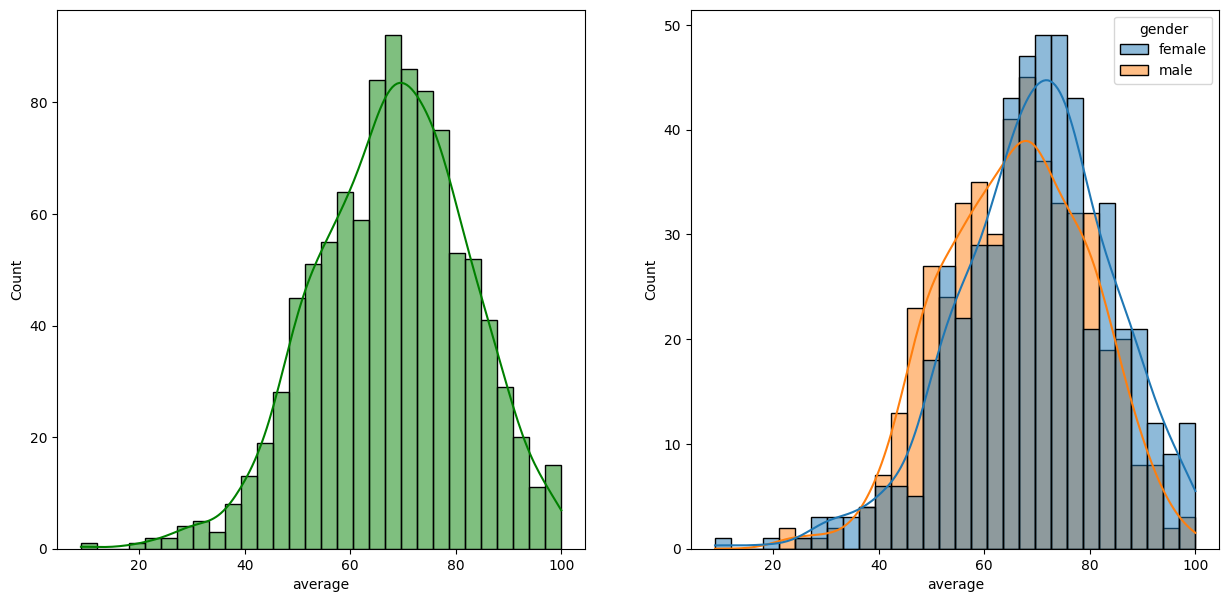

In [18]:
#create avisualization wwith respect to our average and gender
fig,axs=plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='average',bins=30,kde=True,color='g',ax=axs[0])
sns.histplot(data=df,x='average',kde=True,bins=30,hue='gender',ax=axs[1])
plt.show

NOTE=

The above code is attempting to create two subplots using matplotlib and seaborn to visualize the distribution of the "average" column in "df"




<Axes: xlabel='total score', ylabel='Count'>

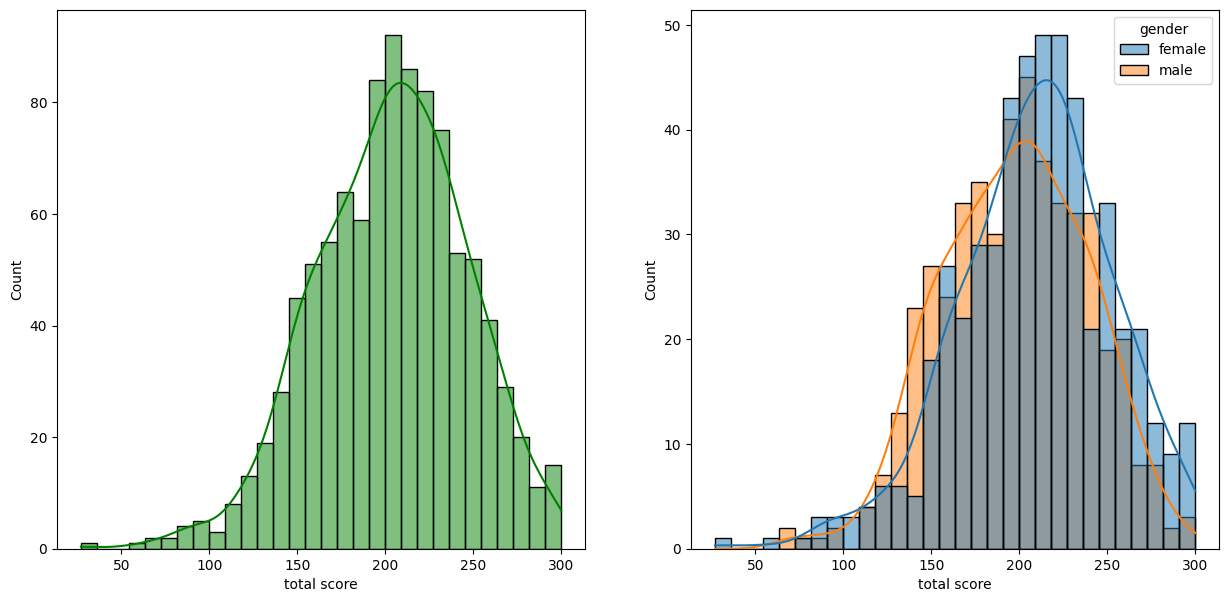

In [19]:
# create a visualization with respect to our total score and gender
fig,axs=plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g',ax=axs[0])
sns.histplot(data=df,bins=30,x='total score',kde=True,hue='gender')

Insights=

From above two examples we conclude that,female students tends to perform well then male students.

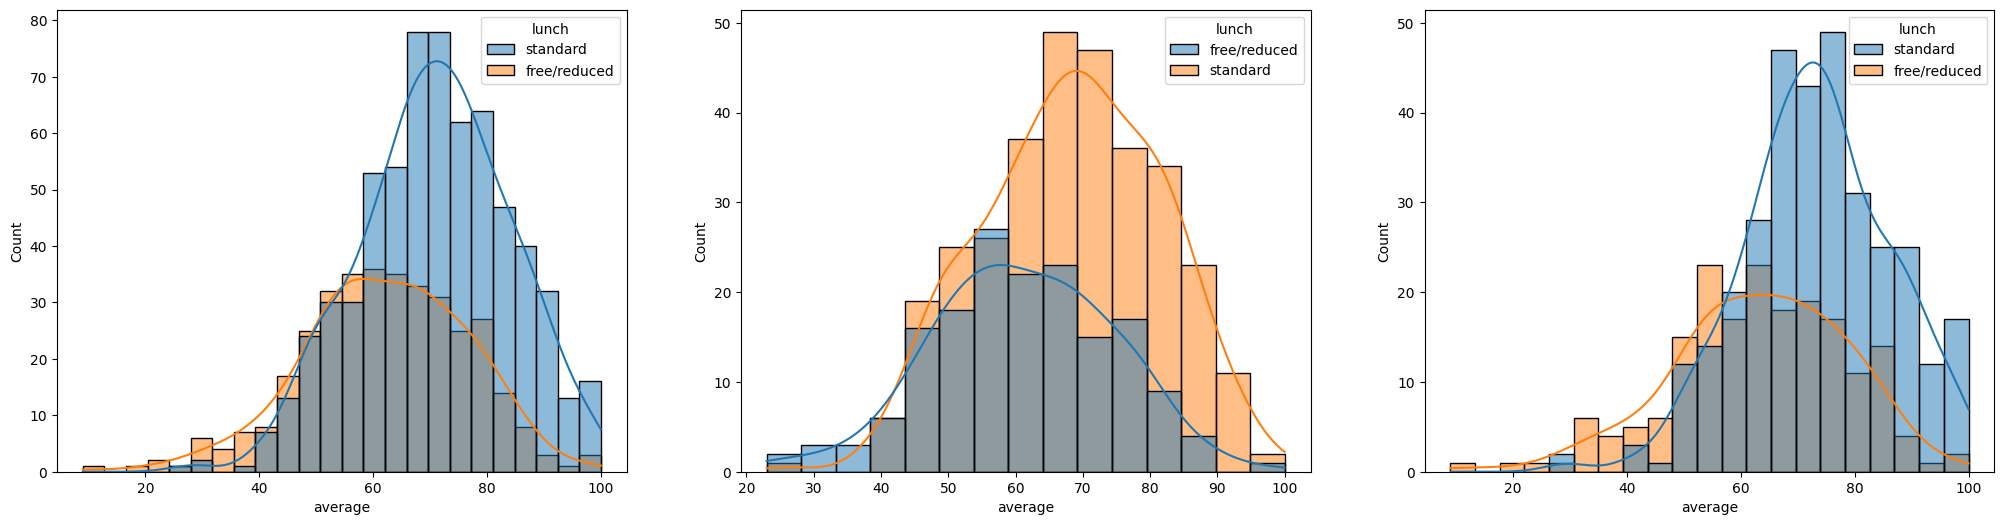

In [20]:
# create a visualization with respect to average and lunch:
plt.subplots(1,3,figsize=(25,6))

#This plot aims to create histogram of "average" for all students,colored by "lunch" type
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')

#This plot aims to create histogram of "average" for male students, colored by "lunch"
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

#This plot aims to create histogram of "average" for female students, colored by "lunch"
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.show()

Insights=

From above we conclude that the students[male,female] with "standard" lunch has a high "average" as compared to students with "free/reduced"  lunch 

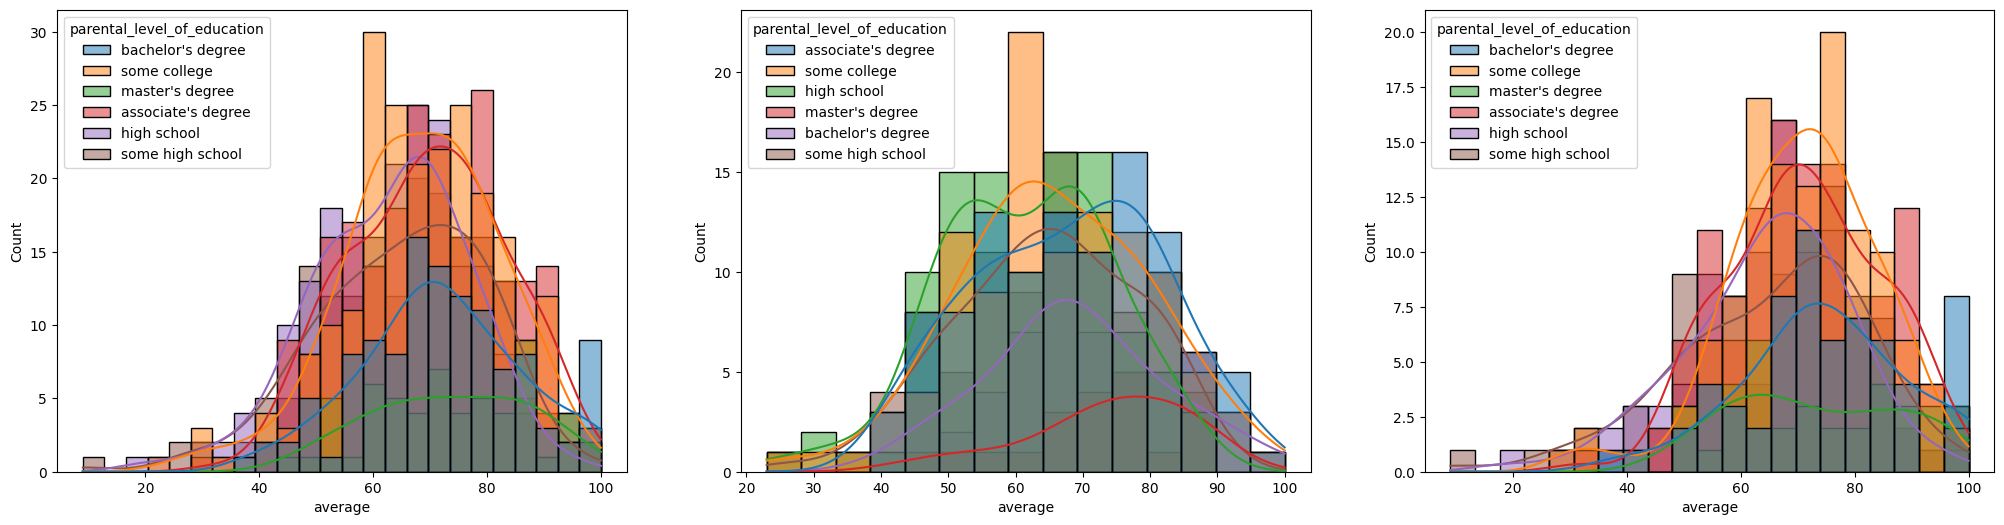

In [21]:
# Create visualization with respect to average and parental level of education:
fig,axs=plt.subplots(1,3,figsize=(25,6))

#This plot aims to create histogram of "average" for all students,colored by "parental_level_of_education" type
sns.histplot(data=df,x='average',kde=True,ax=axs[0],hue='parental_level_of_education')

#This plot aims to create histogram of "average" for male students, colored by "parental_level_of_education"
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,ax=axs[1],hue='parental_level_of_education')


#This plot aims to create histogram of "average" for female students, colored by "parental_level_of_education"
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,ax=axs[2],hue='parental_level_of_education')

plt.show()





NOTE=

1. In general parents education don't help students perform well in exam.

2. Second plot shows that parent's whose education is of associate's degree or masters degree their male child tend to perform well in exam.

3. Third plot ,we can see there is no effect of parental education on female student.

<Axes: xlabel='average', ylabel='Count'>

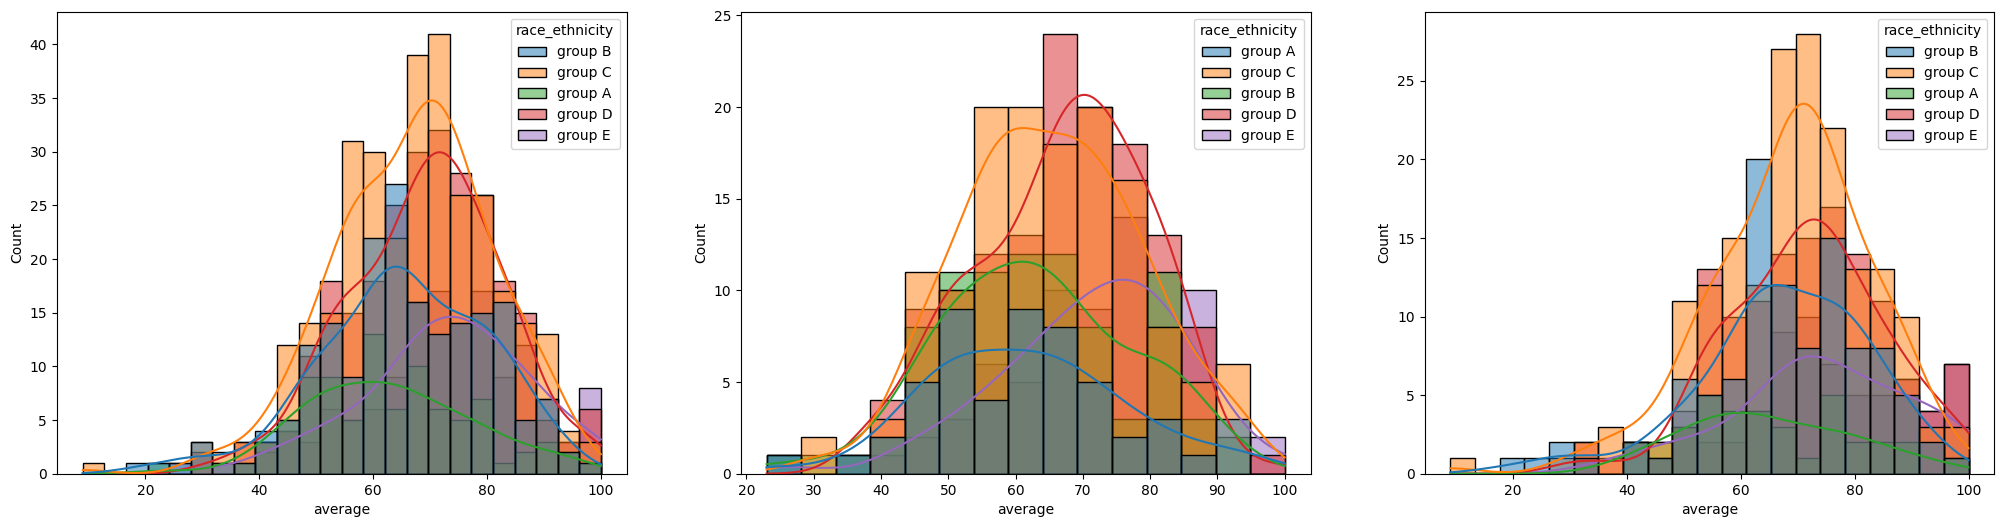

In [22]:
# create a visualization with respect to average and race_ethnicity
fig,axs=plt.subplots(1,3,figsize=(25,6))


sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity',ax=axs[0])


sns.histplot(data=df[df.gender=='male'],x='average',hue='race_ethnicity',ax=axs[1],kde=True)


sns.histplot(data=df[df.gender=='female'],x='average',hue='race_ethnicity',ax=axs[2],kde=True)


Insights=

1. Students of groupA and groupB tend to perfrom poorly in exam.

2. students of groupA  and groupB tend to perfrom poorly in exam irrespective of whether they are male or female.

# Maximum score of students in all three subjects:

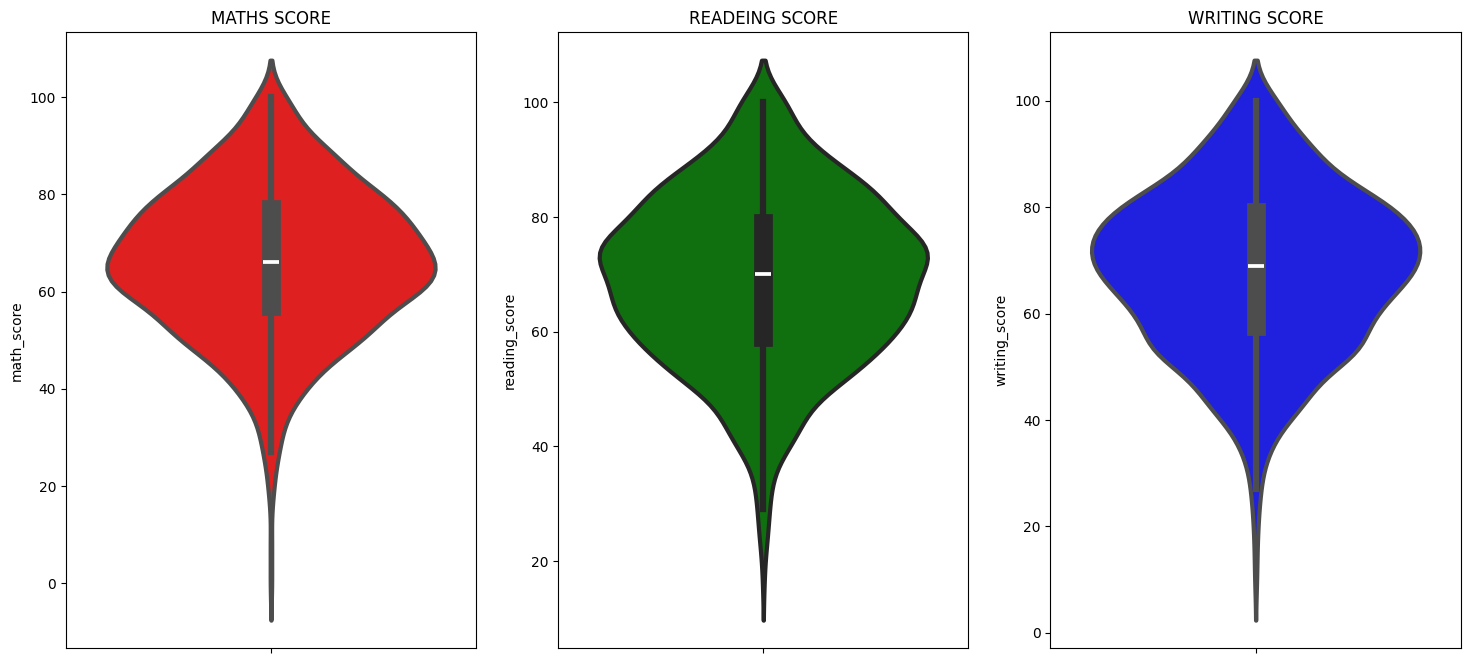

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.title('MATHS SCORE')
sns.violinplot(data=df,y='math_score',color='r',linewidth=3)

plt.subplot(1,3,2)
plt.title('READEING SCORE')
sns.violinplot(data=df,y='reading_score',color='g',linewidth=3)

plt.subplot(1,3,3)
plt.title('WRITING SCORE')
sns.violinplot(data=df,y='writing_score',color='blue',linewidth=3)

plt.show()

Insights=

From above three plots it's clearly visible that most of the students score in between 60-80 in maths, where as in reading and writing most of them score from 50-80

# Multivariate Analysis using pie plot

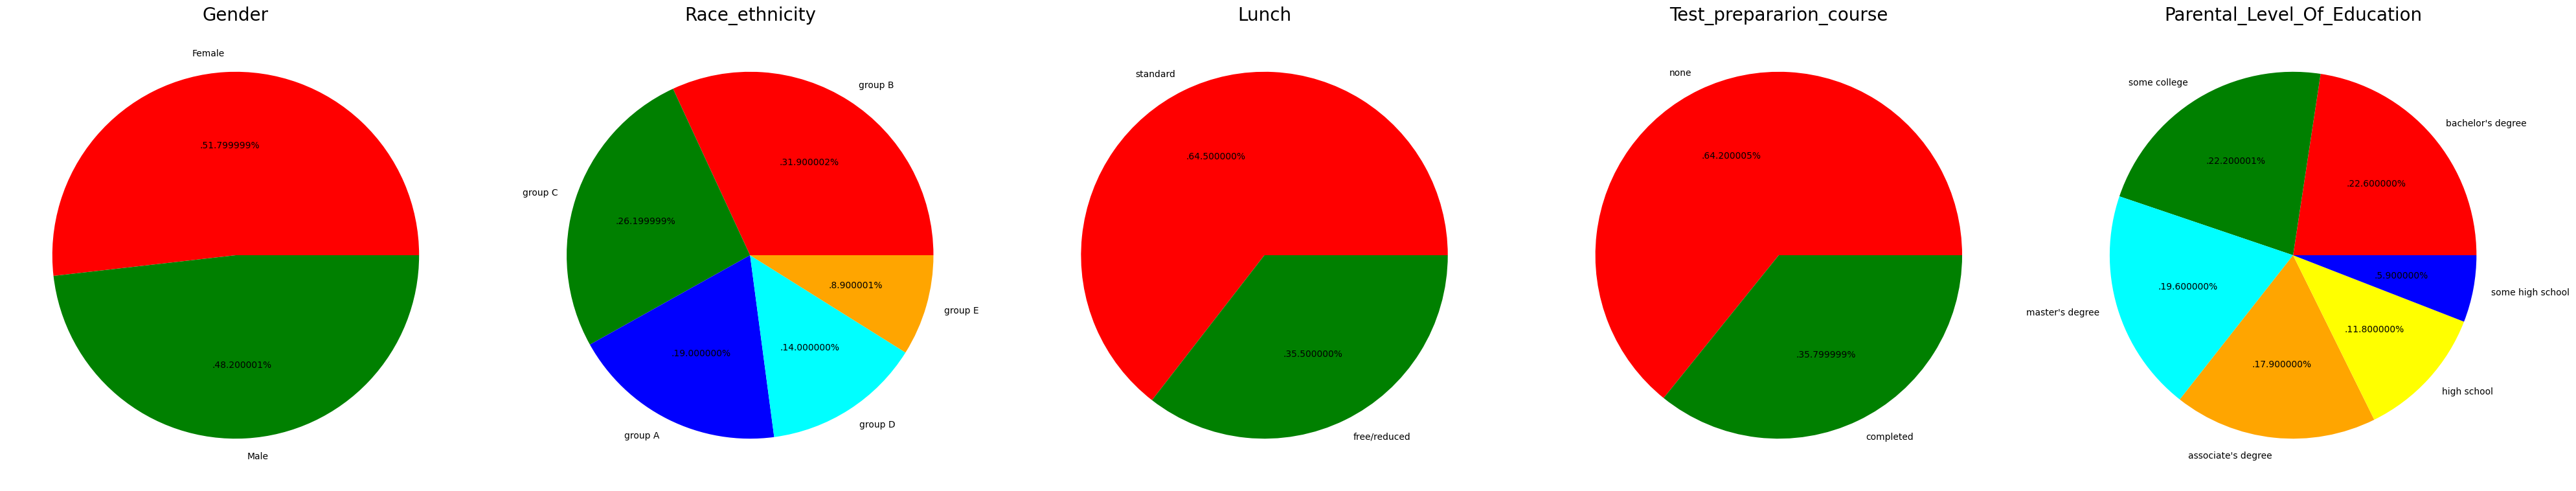

In [24]:
#create visualization for all the categorical variables using pieplot
plt.rcParams['figure.figsize']=(40,20)

#create pieplot for "gender" variable
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['r','g']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

#create pie plot for "race_ethnicity"
plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='group B','group C','group A','group D','group E'
color=['r','g','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Race_ethnicity',fontsize=20)
plt.axis('off')

#create pie plot for "lunch"
plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='standard','free/reduced'
color=['r','g',]

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

#create pie plot for "test_prepararion_course"
plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='none','completed'
color=['r','g',]

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test_prepararion_course',fontsize=20)
plt.axis('off')

#create pie plot for "Parental level of education"
plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels="bachelor's degree",'some college',"master's degree","associate's degree",'high school','some high school'
color=['r','g','cyan','orange','yellow','blue']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental_Level_Of_Education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid
plt.show()






#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


# Feature Wise Visualization

#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Does gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

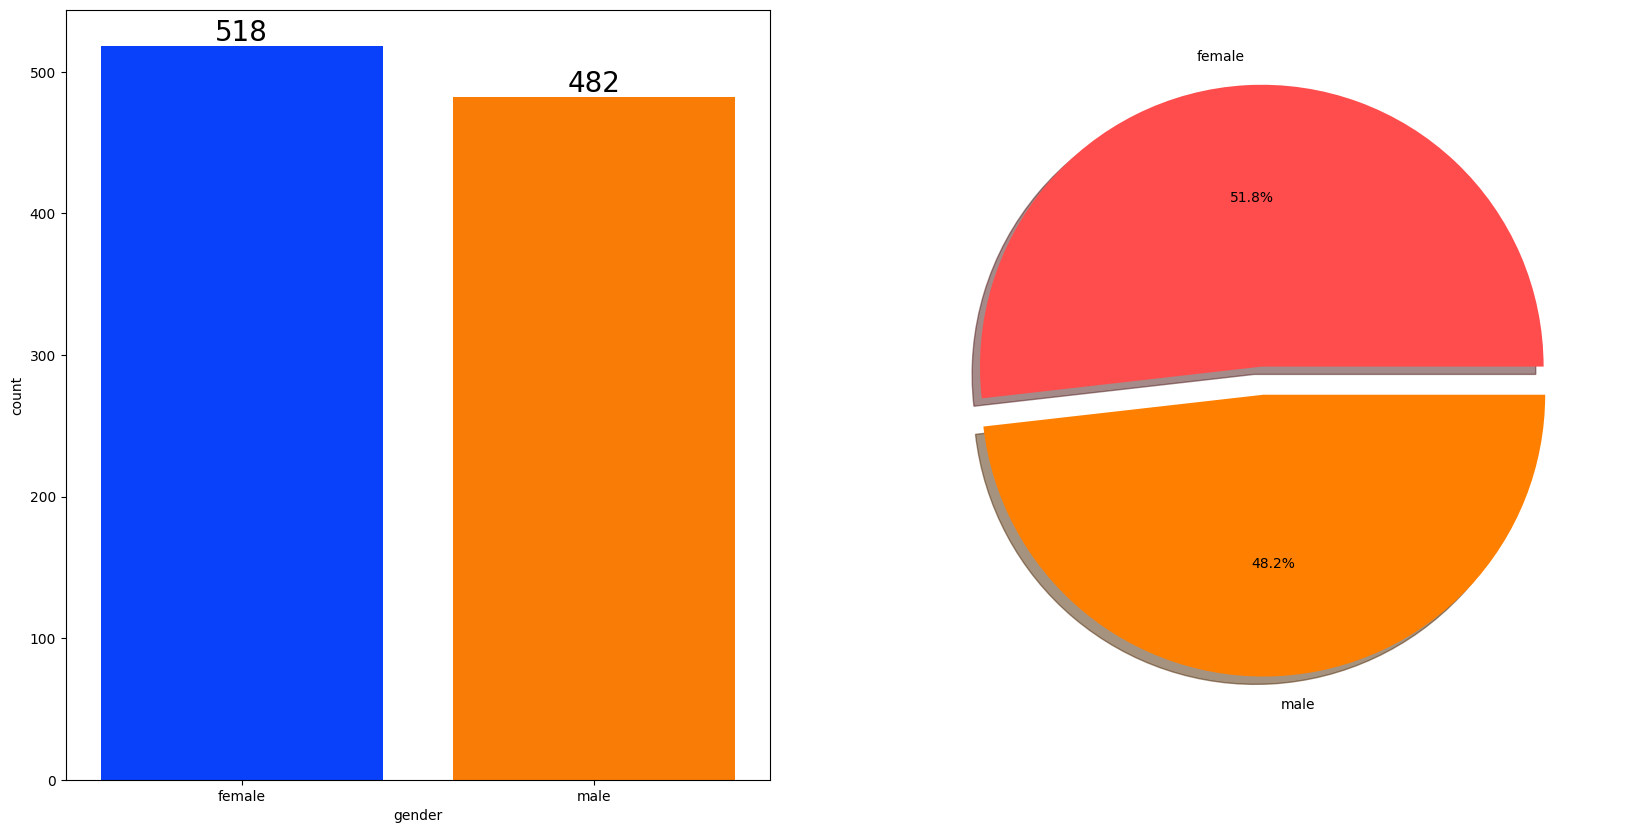

In [25]:
f,axs=plt.subplots(1,2,figsize=(20,10))

# creates visualization[bar chat] to analyze gender distribution using count plot
sns.countplot(x=df['gender'],data=df,palette='bright',ax=axs[0],saturation=0.95)

for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=20)

# creates the visualization to analyze gender distribution using pie plot
plt.pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().index,autopct='%1.1f%%',shadow=True,explode=[0.1,0],colors=['#ff4d4d','#ff8000'])


plt.show()

# Insights

1. The above code creates two visualization to analyze gender distribution in the dataset: [A bar chart using sns.countplot()] and [A pie chart using plt.pie]

2. axs[0].conatiner holds the bars in the count plot. And axs[0].bar_label(container,-------) adds labels(count values) on top of each bar.

3. Gender has balanced data with female students are 518(52%) and male students are 482(48%)

#### BIVARIATE ANALYSIS ( Does gender has any impact on student's performance ? ) 

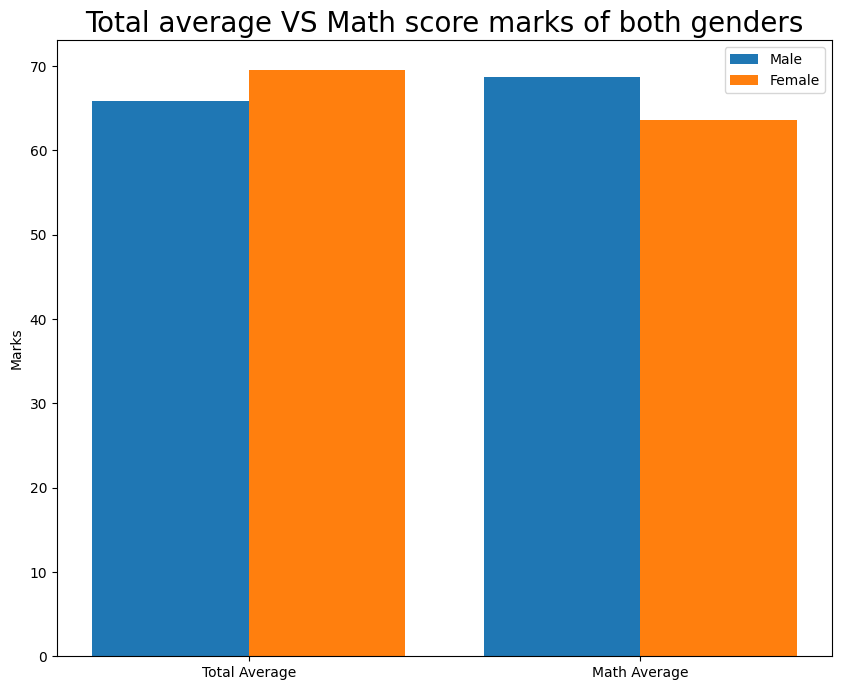

In [26]:
plt.figure(figsize=(10,8))

#x_axis labels
x=['Total Average','Math Average']

# group dataset by "gender" and calculate mean by "average"[Total Average] and "math_score"[Math Average] for males and females
# Extract values using [0] for females and [1] for males
female_score=[df.groupby('gender')['average'].mean()[0],df.groupby('gender')['math_score'].mean()[0]]

male_score=[df.groupby('gender')['average'].mean()[1],df.groupby('gender')['math_score'].mean()[1]]

# Generate numerical positions for "x" values [0,1]
x_axis=np.arange(len(x))


# create the bar chart
# x_axis -0.2 == shifts male bars left
# x_axis +0.2 == shifts female bars right
# 0.4 == width of each bar
plt.bar(x_axis -0.2,male_score,0.4,label='Male')
plt.bar(x_axis +0.2,female_score,0.4,label='Female')
plt.xticks(x_axis,x)
plt.ylabel('Marks')
plt.title("Total average VS Math score marks of both genders",fontsize=20)
plt.legend()
plt.show()

# Insights

1. On an average female have a better overall score than man

2. where as males have scored higher in Maths

#### 4.4.2 RACE_ETHNICITY COLUMN
- How is Group wise distribution ?
- Does Race_Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

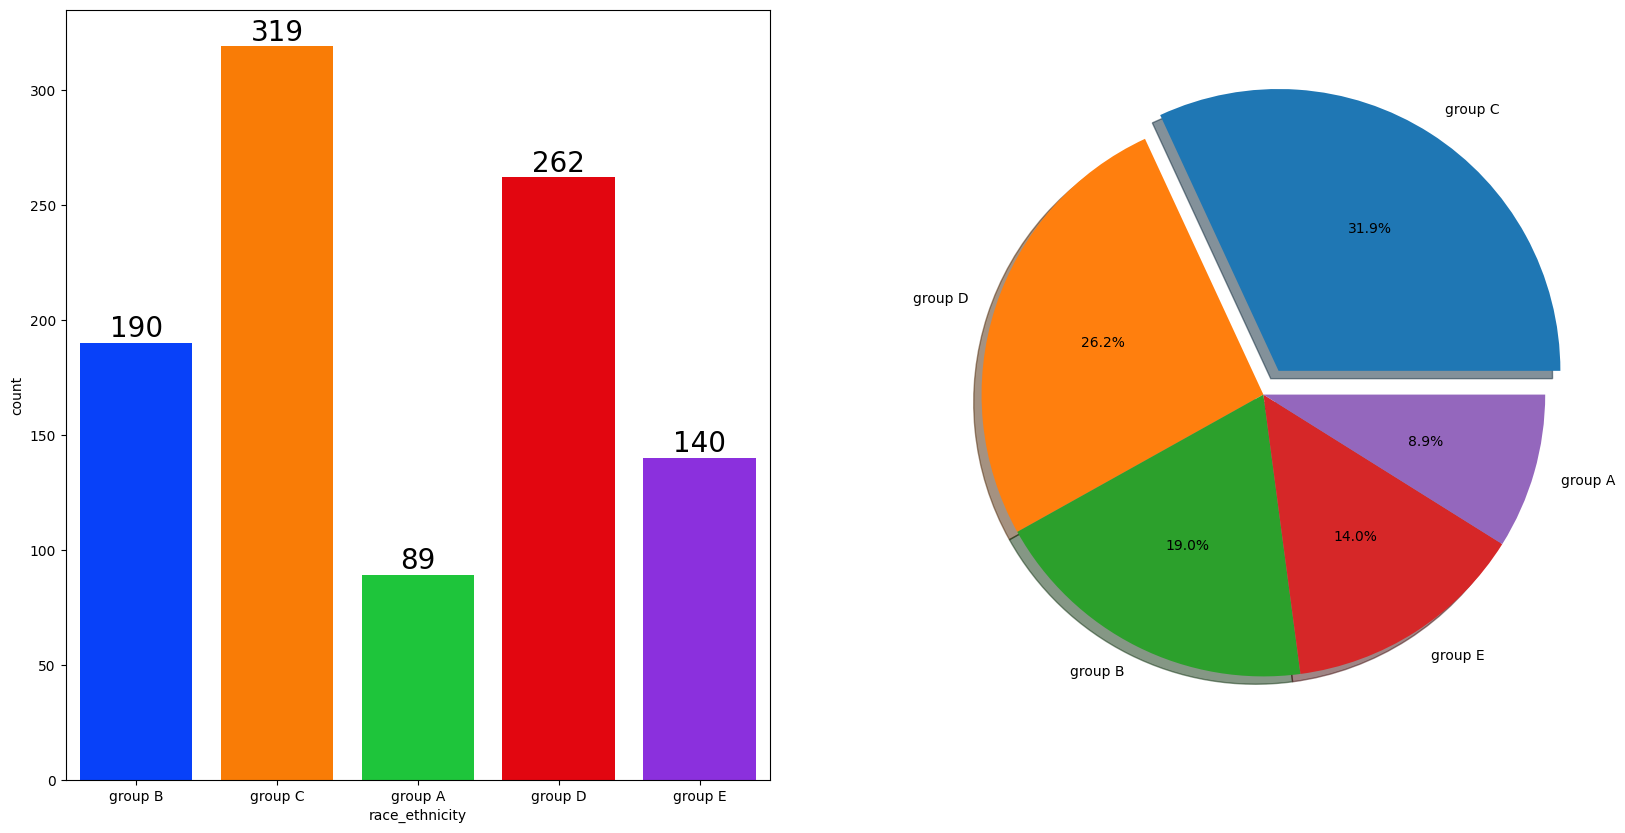

In [27]:
f,axs=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=axs[0],saturation=0.95)

for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=20)



plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)

plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Does Race_Ehnicity has any impact on student's performance  )

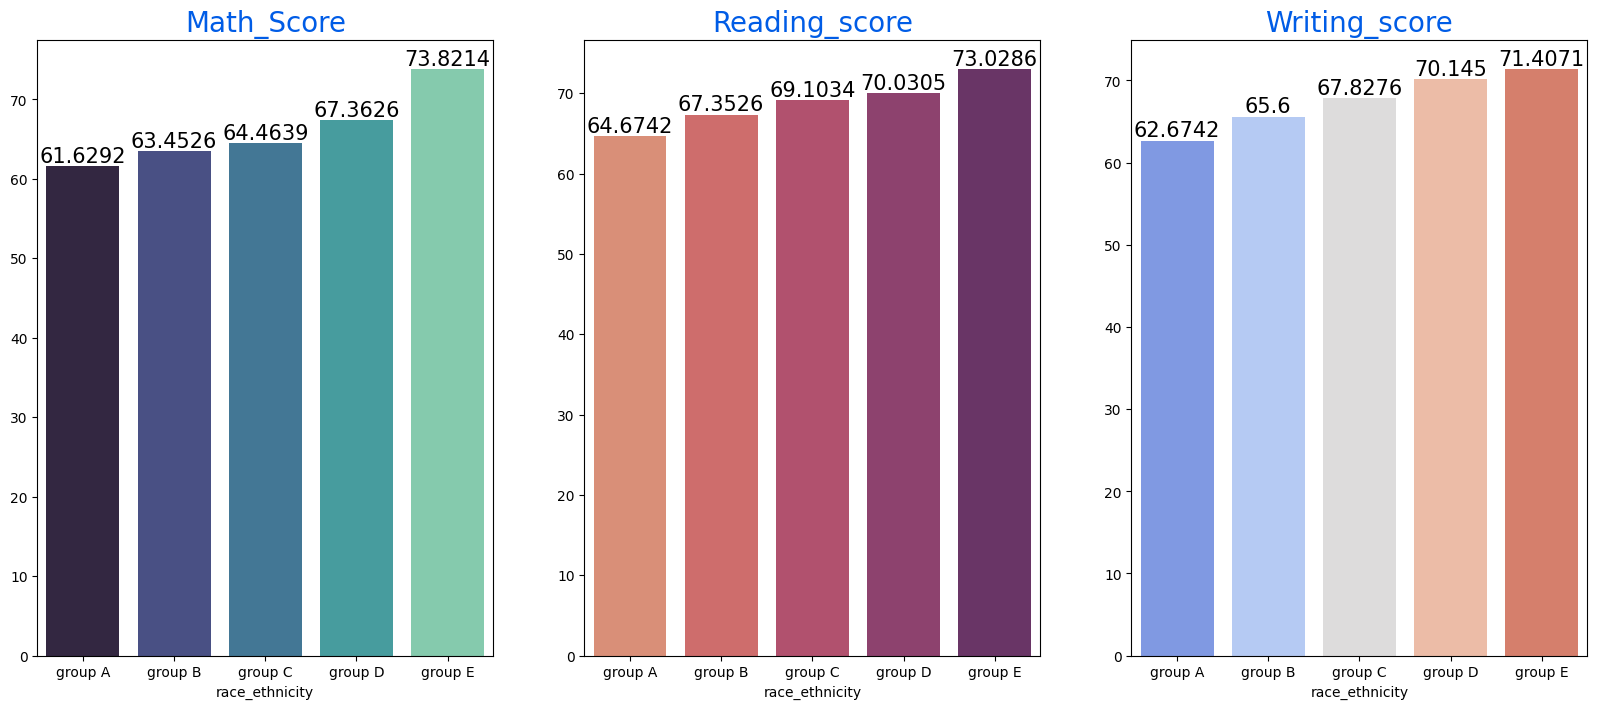

In [28]:
f,axs=plt.subplots(1,3,figsize=(20,8))

# Race_ethnicity VS Math_Score
sns.barplot(x=df.groupby('race_ethnicity')['math_score'].mean().index,y=df.groupby('race_ethnicity')['math_score'].mean().values,palette='mako',ax=axs[0])
axs[0].set_title("Math_Score",color="#005ce6",size=20)

for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=15)

# Race_ethnicity VS Reading_Score
sns.barplot(x=df.groupby('race_ethnicity')['reading_score'].mean().index,y=df.groupby('race_ethnicity')['reading_score'].mean().values,palette='flare',ax=axs[1])
axs[1].set_title("Reading_score",color="#005ce6",size=20)

for container in axs[1].containers:
    axs[1].bar_label(container,color='black',size=15)


# Race_ethnicity VS Writing_Score
sns.barplot(x=df.groupby('race_ethnicity')['writing_score'].mean().index,y=df.groupby('race_ethnicity')['writing_score'].mean().values,palette='coolwarm',ax=axs[2])
axs[2].set_title("Writing_score",color="#005ce6",size=20)

for container in axs[2].containers:
    axs[2].bar_label(container,color='black',size=15)

plt.show()

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socio-economic status have a lower avg in all course subjects

# Parenatal level of education column:

# Univariate Analysis=(what is educational background of student's parent)

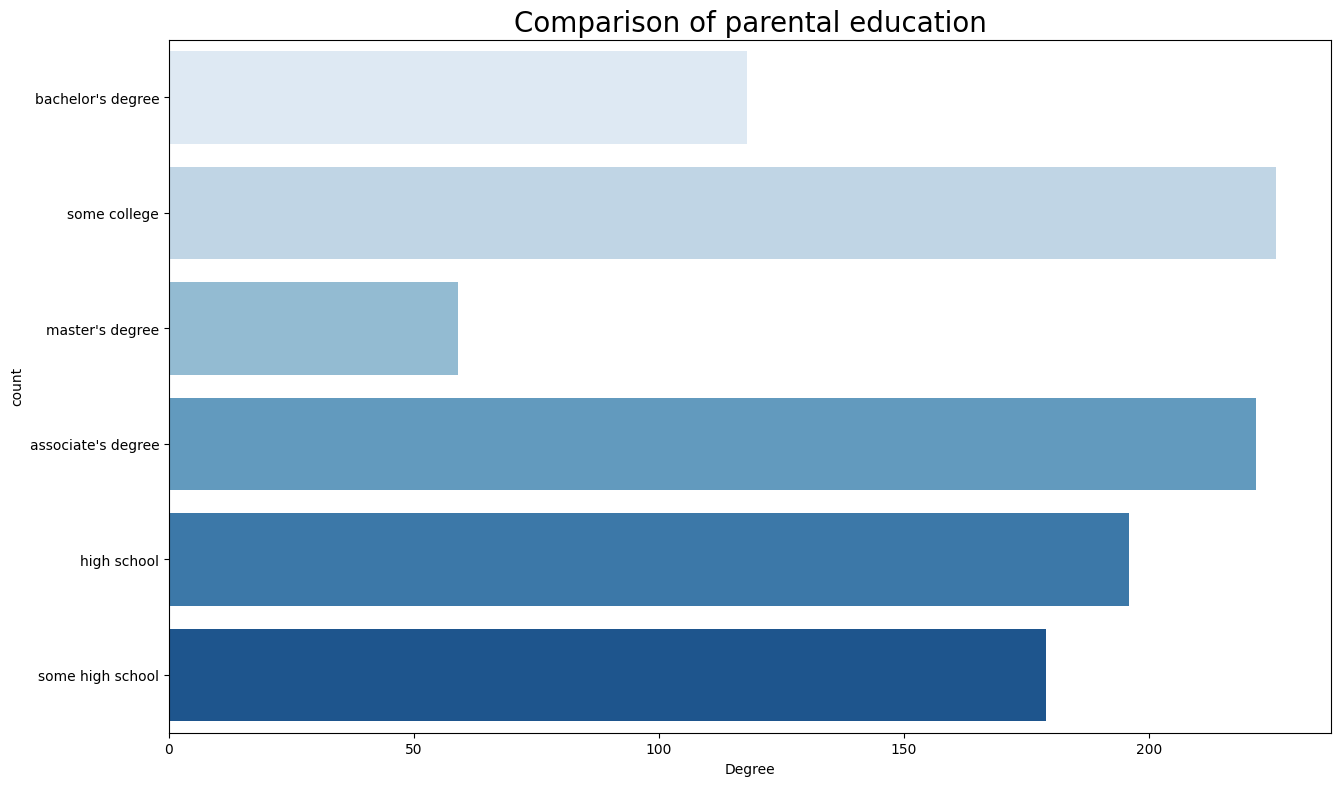

In [36]:
plt.figure(figsize=(15,9))

plt.style.use('default')
sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Comparison of parental education',fontweight=30,fontsize=20)
plt.xlabel("Degree")
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Does parental education has any impact on student's performance ? )

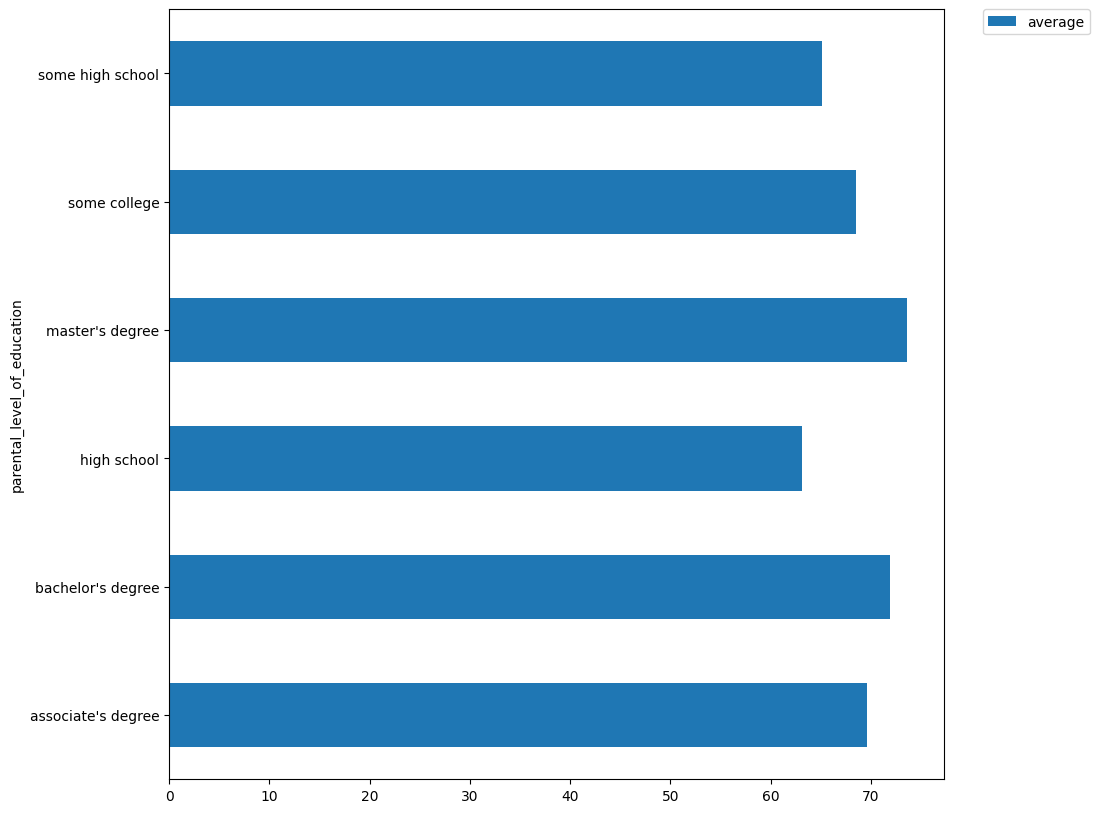

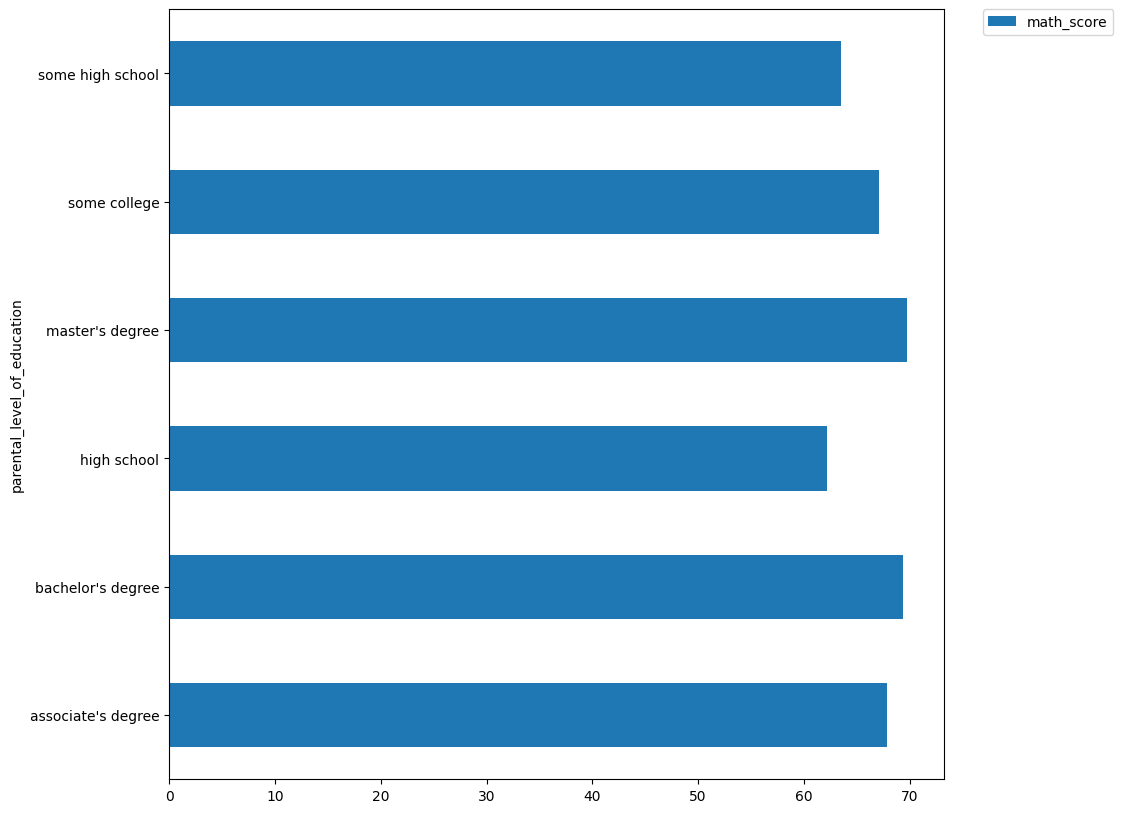

In [67]:

# with respect to average
df.groupby('parental_level_of_education')['average'].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

#with respect to math_score
df.groupby('parental_level_of_education')['math_score'].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)--> moves the legend outside the plot



#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

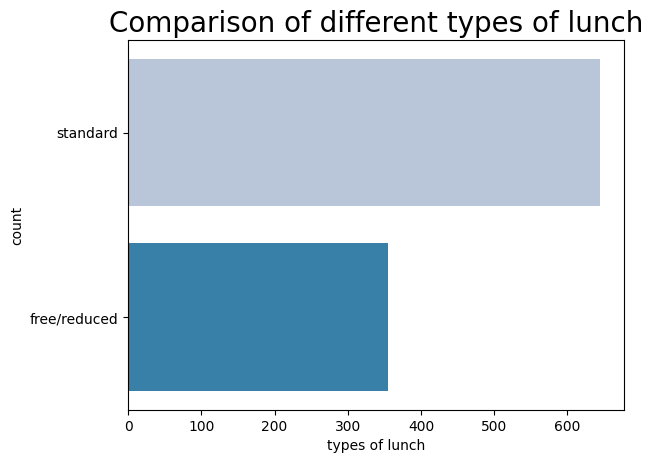

In [68]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('default')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS ( Does lunch type intake has any impact on student's performance  )

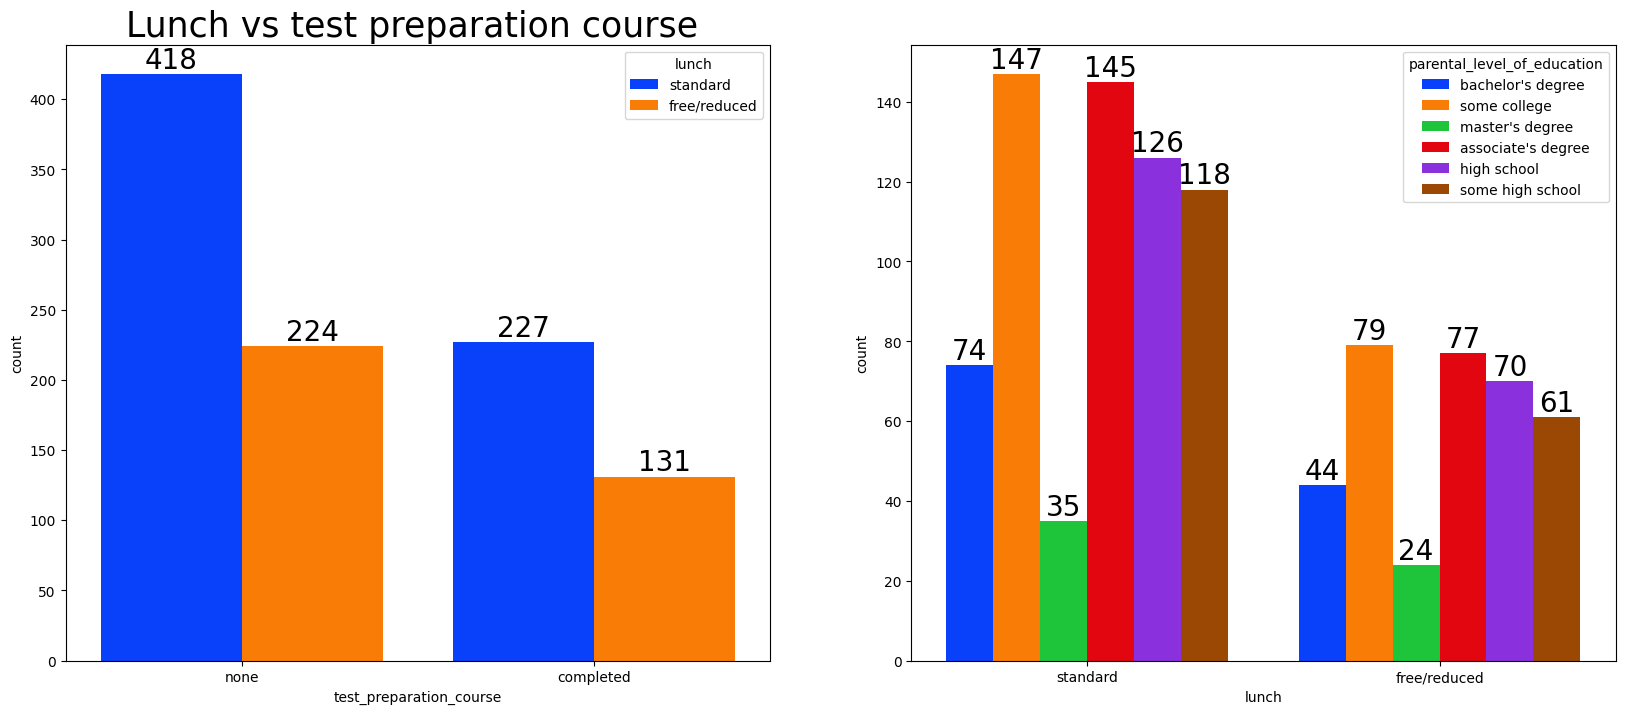

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['test_preparation_course'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[0])
ax[0].set_title('Lunch vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='parental_level_of_education',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

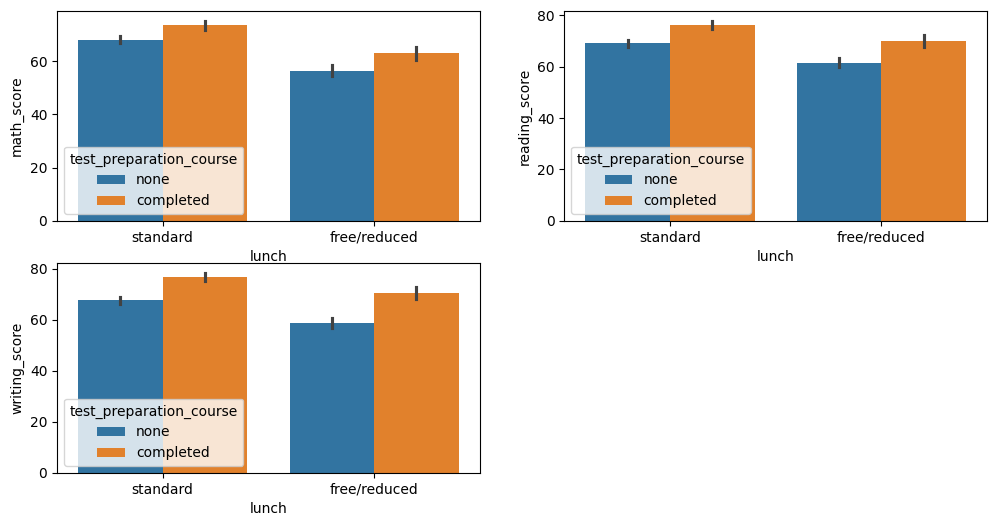

In [70]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

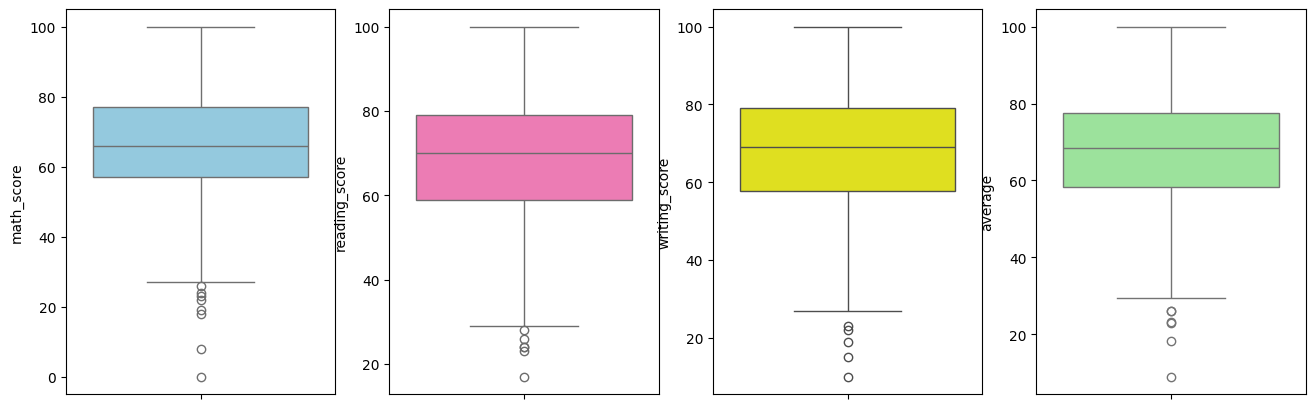

In [71]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

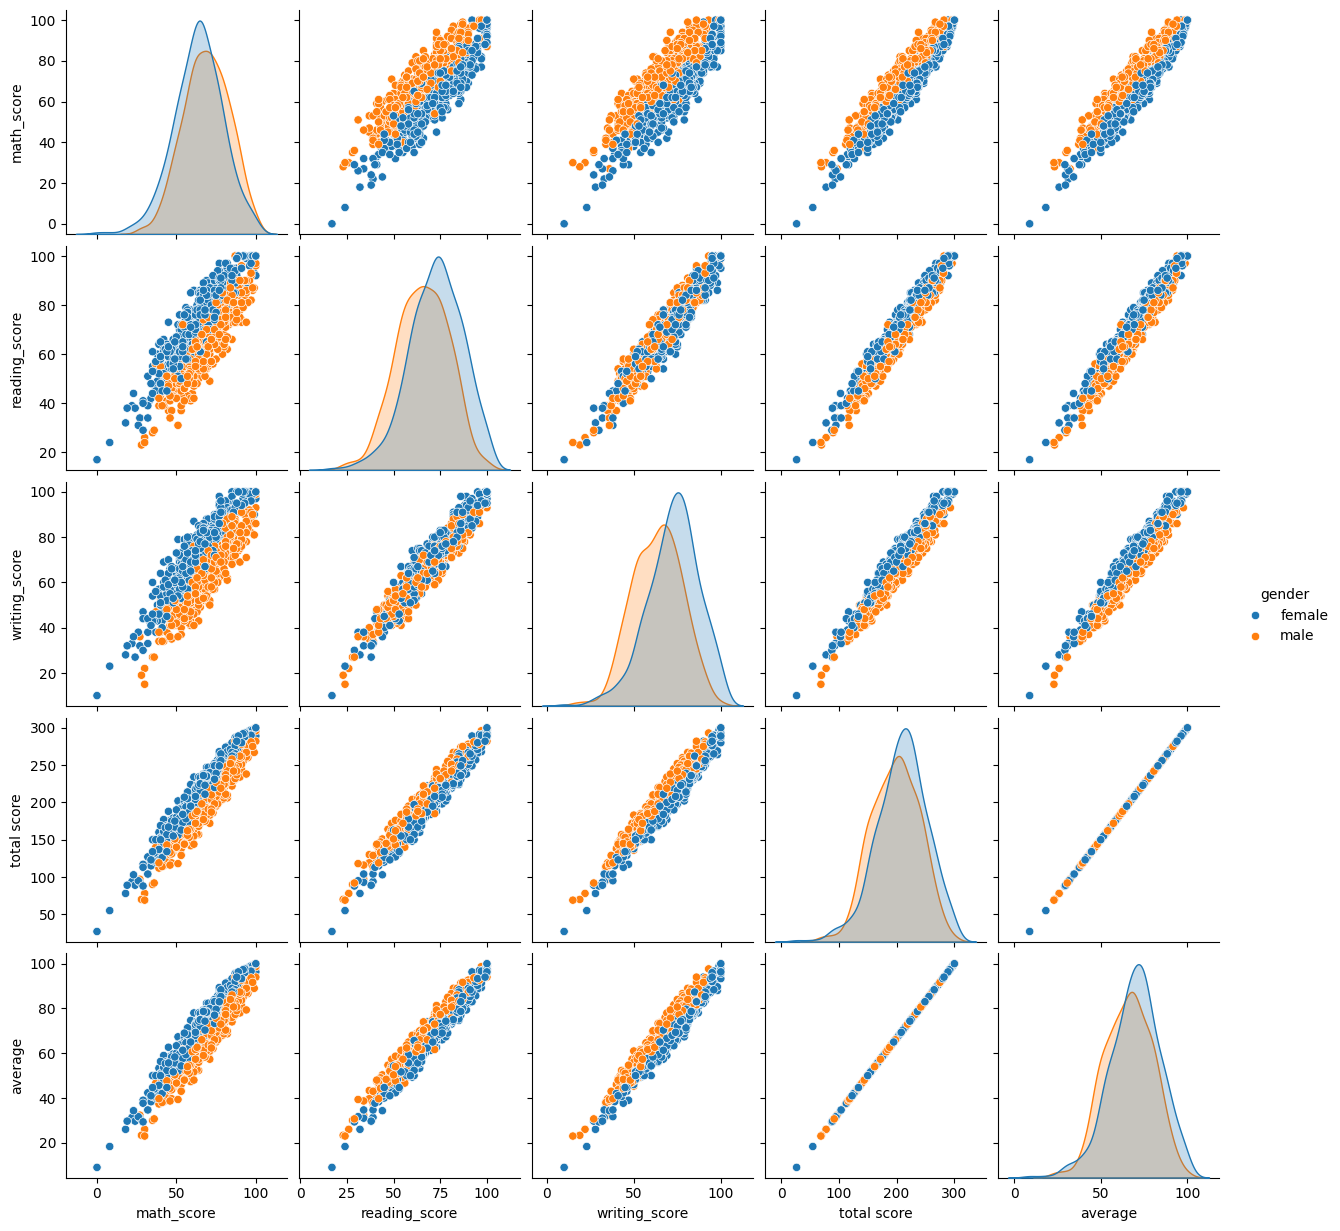

In [72]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.